## 2.0 Reading the Data 

In [1]:
!pip install requests

In [27]:
import pandas as pd
import csv 
import gzip
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np

In [29]:

# Loading the data from 'bom.movie_gross.csv.gz'
df_bom_movies = pd.read_csv('bom.movie_gross.csv.gz')
df_bom_movies


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [30]:
# Loading th data from 'imdb.title.basics.csv.gz'
imdb_title_basics_df = pd.read_csv('imdb.title.basics.csv.gz')
imdb_title_basics_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [31]:
# loading the data from 'imdb.title.ratings.csv.gz'
imdb_title_ratings_df = pd.read_csv('imdb.title.ratings.csv.gz')
imdb_title_ratings_df 

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


## 3.0 Checking the Data 

### 3.1 Checking the number of records in our dataset
Here we will have a brief description about the infomation on the data sets and the total number of records.



In [32]:
# Checking for the number of records and the info in 'bom.movie_gross.csv.gz'
print("\n")
print(df_bom_movies.info())
print("\n")

# Access the shape attribute 
no_of_rows = df_bom_movies.shape[0]
no_of_columns = df_bom_movies.shape[1]

print("The number of rows:", no_of_rows)
print("The number of columns are:", no_of_columns)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


The number of rows: 3387
The number of columns are: 5


In [33]:
# Checking for the number of records in 'imdb.title.basics.csv.gz'
imdb_title_basics_df.info()

print('\n')

# Access the shape attribute 
no_of_rows = imdb_title_basics_df.shape[0]
no_of_columns = imdb_title_basics_df.shape[1]

print("The number of rows:", no_of_rows)
print("The number of columns are:", no_of_columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The number of rows: 146144
The number of columns are: 6


In [34]:
# Checking for the number of record in 'imdb.title.ratings.csv.gz
imdb_title_ratings_df.info()

print('\n')

# Access the shape attribute 
no_of_rows = imdb_title_ratings_df.shape[0]
no_of_columns = imdb_title_ratings_df.shape[1]

print("The number of rows:", no_of_rows)
print("The number of columns are:", no_of_columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


The number of rows: 73856
The number of columns are: 3


## 3.2 Previewing the Top of my Dataset
To view the first few rows of the DataFrame of our Dataset


In [35]:
# Preview the top of the dataset bom.movie_gross.csv.gz
df_bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [36]:
# Preview the top of the datset 'imdb.title.basics.csv.gz'
imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [37]:
# Preview the top of the datset  imdb.title.ratings.csv.gz
imdb_title_ratings_df.head()


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


##  3.3 Previwing the bottom of our dataset
Here we are going to preview the bottom of our dataset.


In [38]:
# Preview the bottom of the dataset bom.movie_gross.csv.gz
df_bom_movies.tail()


,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [39]:
# Preview the bottom of the datset imdb.title.basics.csv.gz
imdb_title_basics_df.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [40]:
 # Preview the bottom of the datset imdb.title.ratings.csv.gz
imdb_title_ratings_df.tail()

,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


## 3.4 Checking Whether each column has an appropriate datatype
Here we are going to check whether each column in the DataFrame has an appropriate data type.

In [41]:
# check the data type using dtypes attribute in  
column_bom_dtypes = df_bom_movies.dtypes
column_bom_dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [42]:
# iterate over the df to check the appropriateness of each data type 
for column, dtype in column_bom_dtypes.items():
    print(f"Column '{column}' has data type: {dtype}")
    


Column 'title' has data type: object
Column 'studio' has data type: object
Column 'domestic_gross' has data type: float64
Column 'foreign_gross' has data type: object
Column 'year' has data type: int64


In [43]:
# check the data type using dtypes attribute in  
column_title_dtypes = imdb_title_basics_df.dtypes
column_title_dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

In [44]:
# iterate over the df to check the appropriateness of each data type 
for column, dtype in column_title_dtypes.items():
    print(f"Column '{column}' has data type: {dtype}")

Column 'tconst' has data type: object
Column 'primary_title' has data type: object
Column 'original_title' has data type: object
Column 'start_year' has data type: int64
Column 'runtime_minutes' has data type: float64
Column 'genres' has data type: object


In [45]:
# check the data type using dtypes attribute in  
column_ratings_dtypes = imdb_title_ratings_df.dtypes
column_ratings_dtypes

tconst            object
averagerating    float64
numvotes           int64
dtype: object

In [46]:
# iterate over the df to check the appropriateness of each data type 
for column, dtype in column_ratings_dtypes.items():
    print(f"Column '{column}' has data type: {dtype}")

Column 'tconst' has data type: object
Column 'averagerating' has data type: float64
Column 'numvotes' has data type: int64


### 4.0 External Data Source Validation

In [32]:


# # Define a function to scrape box office data from Box Office Mojo
# def scrape_box_office(movie_title):
#     url = f"https://www.boxofficemojo.com/search/?q={movie_title.replace(' ', '+')}"
#     response = requests.get(url)
#     soup = BeautifulSoup(response.text, 'html.parser')
    
#     # Extract the first search result link
#     search_result = soup.find(class_='a-link-normal mojo-title-link')
#     if search_result:
#         movie_url = f"https://www.boxofficemojo.com{search_result['href']}"
#         movie_response = requests.get(movie_url)
#         movie_soup = BeautifulSoup(movie_response.text, 'html.parser')
        
#         # Scrape the domestic gross and foreign gross values from the movie page
#         domestic_gross = movie_soup.find(class_='money').text
#         foreign_gross = movie_soup.find(class_='a-section a-text-right mojo-performance-summary-table').find_all(class_='money')[-1].text
        
#         return domestic_gross, foreign_gross
#     else:
#         return None, None

# # Iterate over the first few movies in the dataset and validate against Box Office Mojo
# for i in range(5):
#     movie_title = df_bom_movies['title'][i]
#     expected_domestic_gross, expected_foreign_gross = scrape_box_office(movie_title)
    
#     if expected_domestic_gross and expected_foreign_gross:
#         print(f"Movie: {movie_title}")
#         print(f"Expected Domestic Gross: {expected_domestic_gross}")
#         print(f"Expected Foreign Gross: {expected_foreign_gross}")
#         print("------")
#     else:
#         print(f"No data found for movie: {movie_title}")


In [ ]:
# import requests

# # Iterate over each row in the dataframe
# for index, row in imdb_title_basics_df.iterrows():
#     # Get the movie title and start year
#     movie_title = row['primary_title']
#     start_year = row['start_year']
    
#     # Make a request to IMDb API to get the expected release year
#     response = requests.get(f"http://www.omdbapi.com/?t={movie_title}&apikey=YOUR_API_KEY")
    
#     # Parse the response and extract the expected release year
#     expected_start_year = response.json().get('Year')
    
#     # Compare the expected start year with the value in the dataset
#     if str(start_year) == expected_start_year:
#         print(f"The start year for movie '{movie_title}' is valid.")
#     else:
#         print(f"The start year for movie '{movie_title}' is invalid. Expected: {expected_start_year}, Actual: {start_year}")


In [ ]:
import requests

API_KEY = 'YOUR_API_KEY'

# Iterate over each row in the dataframe
for index, row in imdb_title_basics_df.iterrows():
    # Get the movie title and start year
    movie_title = row['primary_title']
    start_year = row['start_year']
    
    # Make a request to IMDb API to get the expected release year
    response = requests.get(f"http://www.omdbapi.com/?t={movie_title}&apikey={API_KEY}")
    
    # Parse the response and extract the expected release year
    expected_start_year = response.json().get('Year')
    
    # Compare the expected start year with the value in the dataset
    if str(start_year) == expected_start_year:
        print(f"The start year for movie '{movie_title}' is valid.")
    else:
        print(f"The start year for movie '{movie_title}' is invalid. Expected: {expected_start_year}, Actual: {start_year}")


## 5.0 Cleaning the Data 


### 5.1 Checking for Outliers

In [66]:
# checking for outliers in df_bom_movies

# Calculate the IQR for the domestic gross
domestic_gross = df_bom_movies['domestic_gross'].dropna()
q1 = np.percentile(domestic_gross, 25)
q2 = np.percentile(domestic_gross, 75)
iqr = q2 - q1

# Define the lower and upper fences 
lower_fence = q1 - 1.5 * iqr
upper_fences = q3 + 1.5 * iqr

# find the outliers
outliers_domestic_gross = df_bom_movies[(df_bom_movies['domestic_gross'] < lower_fence) | (df_bom_movies['domestic_gross'] > upper_fence)]


# Display the outliers
outliers_domestic_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


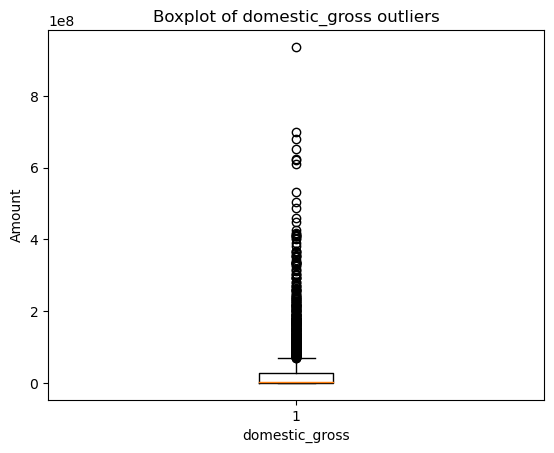

In [69]:
# Create a  boxplot for the dataset 
# Create a boxplot of the domestic gross column 
plt.boxplot(df_bom_movies['domestic_gross'].dropna())

# Set labels and title 
plt.title('Boxplot of domestic_gross outliers')
plt.xlabel('domestic_gross')
plt.ylabel('Amount')

# Show the plot 
# plt.legend()
plt.show()


# # Create a boxplot of the domestic gross column
# plt.boxplot(df_bom_movies['domestic_gross'].dropna())

# # Set labels and title
# plt.xlabel('domestic_gross')
# plt.ylabel('Amount')
# plt.title('Boxplot of domestic_gross')

# # Show the plot
# plt.show()


In [79]:

# Checking for outliers in imdb_title_basics_df
# Calculate the IQR for the 'runtime_minutes' column
q1 = imdb_title_basics_df['runtime_minutes'].quantile(0.25)
q3 = imdb_title_basics_df['runtime_minutes'].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper fences
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

# Find the outliers
outliers = imdb_title_basics_df[(imdb_title_basics_df['runtime_minutes'] < lower_fence) | (imdb_title_basics_df['runtime_minutes'] > upper_fence)]

# Display the outliers
print(outliers)


           tconst                                      primary_title   
0       tt0063540                                          Sunghursh  \
12      tt0159369                 Cooper and Hemingway: The True Gen   
15      tt0176694                                 The Tragedy of Man   
70      tt0396123                                   Den milde smerte   
75      tt0403645                                 Burnt by the Sun 2   
...           ...                                                ...   
146082  tt9906270  Footloose in Italy III: 3 Naples, Sorrento, Am...   
146083  tt9906278      A Classic Tour of Scotland: Footloose Special   
146085  tt9906696       Footloose in Italy IV: 4 Rimini Tuscany Rome   
146086  tt9906844               Footloose in England's Lake District   
146112  tt9911306                                     Kalikkoottukar   

                                           original_title  start_year   
0                                               Sunghursh     

In [80]:
# Checking for outliers in imdb_title_basics_df
# Calculate the IQR {interquartile range} for the 'runtime_minutes' column

q1 = imdb_title_basics_df['runtime_minutes'].quantile(0.25)
q2 =imdb_title_basics_df['runtime_minutes'].quantile(0.75)
iqr = q2 - q1

# Define the lower and upper fences 
lower_fence = q1 - 1.5 * iqr
upper_fences = q2 + 1.5 * iqr

# find the outliers
outliers_runtime_minutes = imdb_title_basics_df[(imdb_title_basics_df['runtime_minutes'] < lower_fence) | (imdb_title_basics_df['runtime_minutes'] > upper_fence)]


# Display the outliers
outliers_runtime_minutes


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
12,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary
15,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History"
70,tt0396123,Den milde smerte,Den milde smerte,2010,280.0,Drama
75,tt0403645,Burnt by the Sun 2,Utomlennye solntsem 2,2010,181.0,"Drama,History,War"
...,...,...,...,...,...,...
146082,tt9906270,"Footloose in Italy III: 3 Naples, Sorrento, Am...","Footloose in Italy III: 3 Naples, Sorrento, Am...",2016,150.0,NaN
146083,tt9906278,A Classic Tour of Scotland: Footloose Special,A Classic Tour of Scotland: Footloose Special,2016,151.0,NaN
146085,tt9906696,Footloose in Italy IV: 4 Rimini Tuscany Rome,Footloose in Italy IV: 4 Rimini Tuscany Rome,2016,150.0,NaN
146086,tt9906844,Footloose in England's Lake District,Footloose in England's Lake District,2017,150.0,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

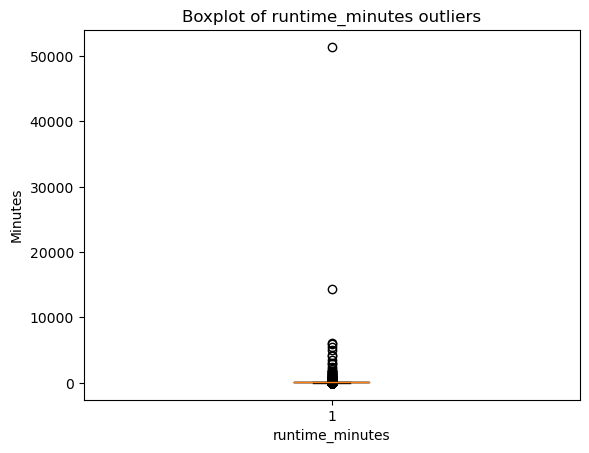

In [87]:
# Create a boxplot of the 'runtime_minutes' column 
plt.boxplot(imdb_title_basics_df['runtime_minutes'].dropna())

# Set labels and title 
plt.title('Boxplot of runtime_minutes outliers')
plt.xlabel('runtime_minutes')
plt.ylabel('Minutes')

# Display plot
plt.show



In [94]:
# Checking for outliers in imdb_title_ratings_df
# Calculating the IQR for 'averageratng' column
q1 = np.percentile(imdb_title_ratings_df['averagerating'], 25)
q2 = np.percentile(imdb_title_ratings_df['averagerating'], 75)
iqr = q2 - q1 

# Define the lower and upper fences 
lower_fences = q1 - 1.5 * iqr
upper_fences = q2 + 1.5 * iqr

# Find the outliers 
outliers_averagerating = imdb_title_ratings_df[(imdb_title_ratings_df['averagerating']< lower_fence) | (imdb_title_ratings_df['averagerating'] > upper_fence)]


outliers_averagerating


,tconst,averagerating,numvotes
45,tt1332570,2.1,17
46,tt1343110,2.5,345
82,tt1478277,2.6,102
121,tt1555187,2.0,164
146,tt1595637,2.4,310
...,...,...,...
73449,tt3624600,2.2,12
73603,tt7335732,2.6,69
73661,tt7666582,2.4,126
73825,tt9443892,2.3,6


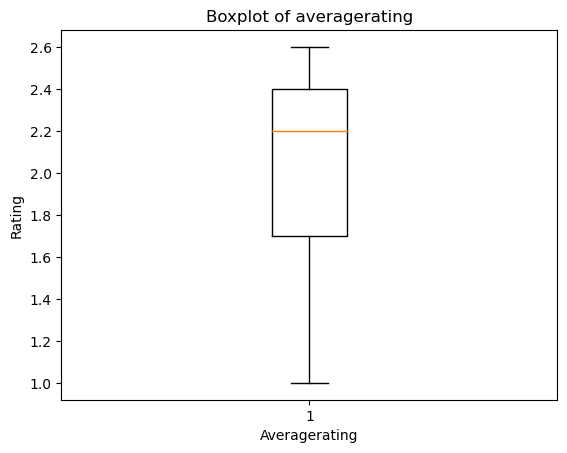

In [93]:
# Creating a boxplot to show the outliers in  imdb_title_ratings_df
# Create a boxplot of 'averagerating
plt.boxplot(outliers_averagerating['averagerating'].dropna())

# Set labels an title 
plt.title('Boxplot of averagerating')
plt.xlabel('Averagerating')
plt.ylabel('Rating')

#Display the file
plt.show()



### 5.2 Checking for Anomalies 

In [98]:
# Checking for Anomalies in bom_movies 
# here i use descriptive statistics for the numerical variables in bom_movies
# Calculate summary statistics for numerical variables 
numerical_cols = ['domestic_gross', 'foreign_gross']
descriptive_statistics_df = df_bom_movies[numerical_cols].describe()

descriptive_statistics_df

,domestic_gross,foreign_gross
count,3.359000e+03,2.032000e+03
mean,2.874585e+07,7.505704e+07
std,6.698250e+07,1.375294e+08
min,1.000000e+02,6.000000e+02
25%,1.200000e+05,3.775000e+06
50%,1.400000e+06,1.890000e+07
75%,2.790000e+07,7.505000e+07
max,9.367000e+08,9.605000e+08


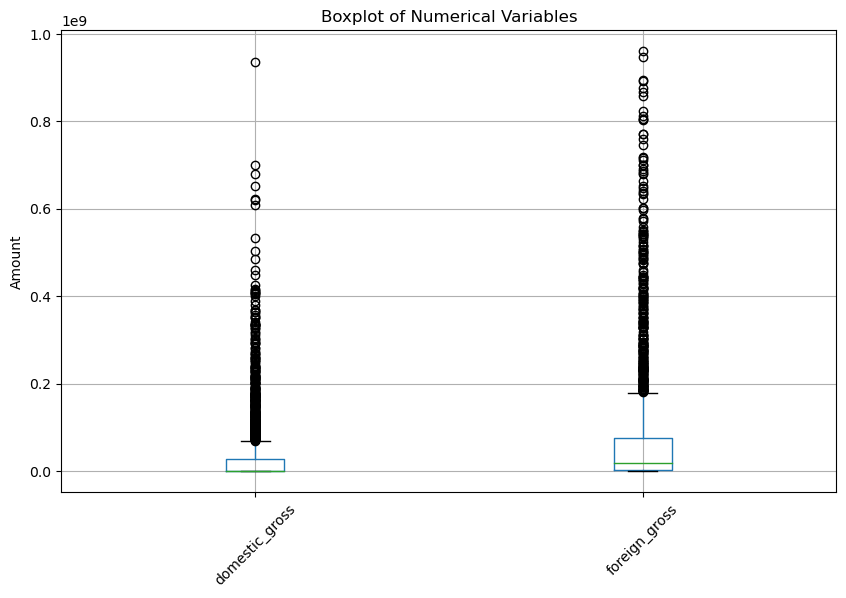

In [99]:

# Box plot of numerical variables
plt.figure(figsize=(10, 6))
df_bom_movies[numerical_cols].boxplot()
plt.title('Boxplot of Numerical Variables')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()


The boxplot above shows the anomalies present in the bom_movies.

In [102]:
# checking for anomalies in imdb_title_basics_df
# here i use descriptive statistics for the numerical variables in bom_movies
print(imdb_title_basics_df.describe())

# print(imdb_title_basics_df.isnull().sum())

print(imdb_title_basics_df['start_year'].value_counts())
print(imdb_title_basics_df['runtime_minutes'].value_counts())
print(imdb_title_basics_df['genres'].value_counts())



          start_year  runtime_minutes
count  146144.000000    114405.000000
mean     2014.621798        86.187247
std         2.733583       166.360590
min      2010.000000         1.000000
25%      2012.000000        70.000000
50%      2015.000000        87.000000
75%      2017.000000        99.000000
max      2115.000000     51420.000000
start_year
2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2026        1
2025        1
2115        1
2027        1
Name: count, dtype: int64
runtime_minutes
90.0     7131
80.0     3526
85.0     2915
100.0    2662
95.0     2549
         ... 
319.0       1
354.0       1
476.0       1
338.0       1
447.0       1
Name: count, Length: 367, dtype: int64
genres
Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         

In [ ]:
Here in the descriptive analysis by examining the mean, standard deviation and quartiles i can identify any values that deviate significantly from the expected range.
For example the maximum 'start-year' of 2115 and the  maximum 'runtime_minutes' of 51,1420 seem unusual and could be potential anomalies. 

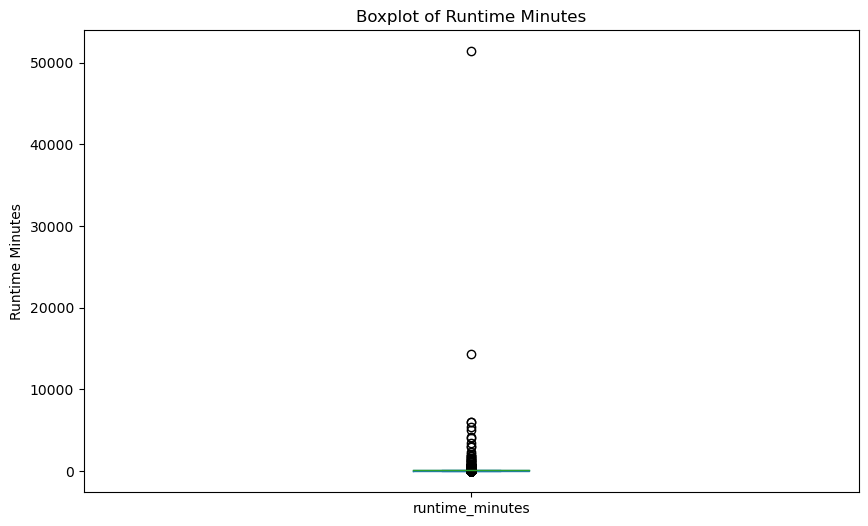

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
imdb_title_basics_df['runtime_minutes'].plot(kind='box')
plt.title('Boxplot of Runtime Minutes')
plt.ylabel('Runtime Minutes')
plt.show()


In [104]:
# Checking for anomalies in imdb_title_ratings_df
# Start by descriptive statistics 

imdb_title_ratings_df.describe()



,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


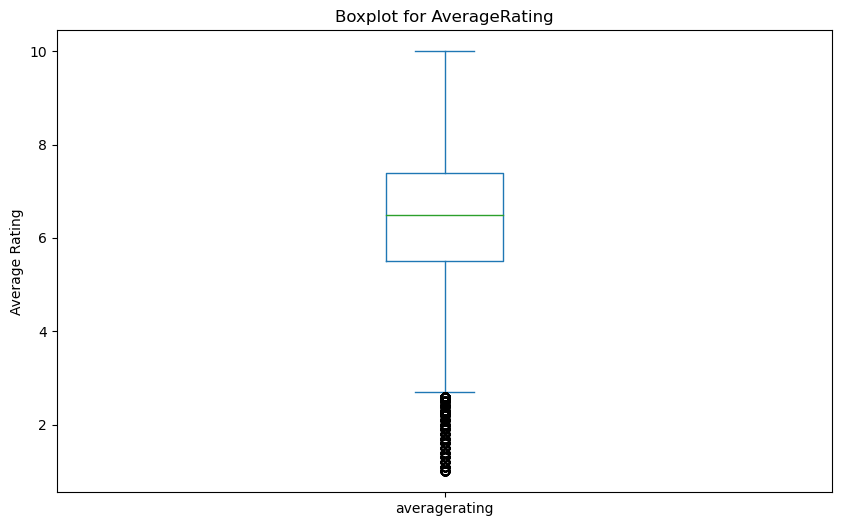

In [114]:
# Create visuals to gain insights into the distribution
# boxplot to show anomalies in averagerating
plt.figure(figsize=(10, 6))
imdb_title_ratings_df['averagerating'].plot(kind='box')
plt.title('Boxplot for AverageRating')
plt.ylabel('Average Rating')
plt.show()

# # Histogram  to show anomalies in number of votes
# imdb_title_ratings_df['numvotes'].plot(kind='hist', bins=5)
# plt.title('Histogram of Number of Votes')
# plt.xlabel('Number of Votes')
# plt.ylabel('Frequency')
# plt.show()




The Boxplot shows the distribution of average ratings. Any points that lie significantly outside the whiskers are considered anomalies. They may represent movies with unusually high or low ratings.


### 5.3 Checking for missing values 

In [116]:
# check for missing values in df_bom_movies
missing_values_bom = df_bom_movies.isnull().sum()
missing_values_bom


title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

In [117]:
# check for missing values in df_bom_movies imdb_title_basics_df
missing_values_imdb_title = imdb_title_basics_df.isnull().sum()
missing_values_imdb_title


tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [118]:
# check for missing values in df_bom_movies imdb_title_ratings_df
missing_values_imdb_ratings = imdb_title_ratings_df.isnull().sum()
missing_values_imdb_ratings


tconst           0
averagerating    0
numvotes         0
dtype: int64

### 5.4 Dealing with the missing values

In [127]:
#  Dealing with missing values in df_bom_movies
# Here i'll use imputation to fill in the missing values using median imputation 
df_bom_movies['domestic_gross'].fillna(df_bom_movies['domestic_gross'].median(), inplace=True)
df_bom_movies['foreign_gross'].fillna(df_bom_movies['foreign_gross'].median(), inplace=True)

missing_values = df_bom_movies.isnull().sum()
missing_values

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [133]:
# Dealing with missing values from imdb_title_basics_df
# Here i use imputation to fill in th numerical value missing in the runtime_minute using median 
imdb_title_basics_df['runtime_minutes'].fillna(imdb_title_basics_df['runtime_minutes'].median(), inplace=True)

# Here i use imputation to fill in the categorical values missing in the columns below
imdb_title_basics_df['genres'].fillna(imdb_title_basics_df['genres'].mode()[0], inplace=True)
imdb_title_basics_df['primary_title'].fillna(imdb_title_basics_df['primary_title'].mode()[0], inplace=True)
imdb_title_basics_df['original_title'].fillna(imdb_title_basics_df['original_title'].mode()[0], inplace=True)
                                      
missing_values_imdb_title = imdb_title_basics_df.isnull().sum()
missing_values_imdb_title


tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64